# Dynamics of mass, spring and damper system
#### Dinesh A (153010009)

## Introduction
To study a motion of a mass with given initial state connected to a
wall with a spring and a damper can be done using differential
equations. Lets assume a mass (m) is connected to a wall with spring
of stiffness k and a damper of constant c. Assume that the mass m is
given a initial displacement of x and released with zero velocity


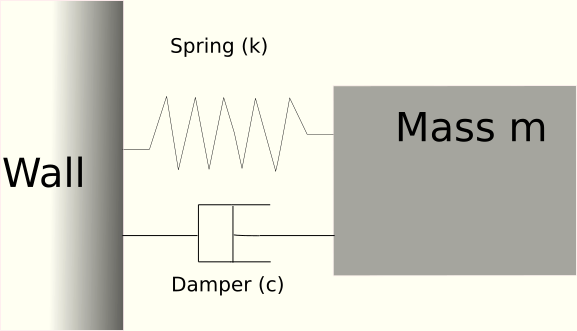

In [2]:
from IPython.display import Image
Image(filename='mass_damper.png')

## Forces on mass
Since the mass attached to a spring and a damper, there will be two forces 
on the mass when it is disturbed from its equilibrium position.

### Hooke's Law

Hooke's law  states that if a spring is  elongated with  an amount  x, then
force exerted by the spring on the object elongating is

$$   F_s = -kx $$

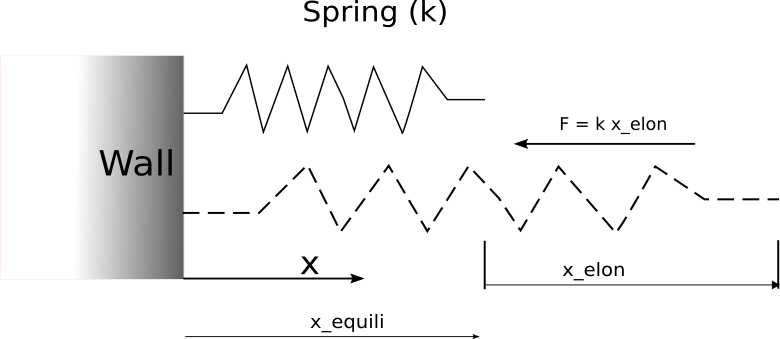

In [3]:
from IPython.display import Image
Image(filename='hookes_law.png')

### Damping force
The force from the damper to reduce the energy of
the mass is 

$$   F_d = -c\frac{dx}{dt} $$

The total force on the mass neglecting gravity at a given time is

$$ F_{total} = F_s + F_d $$

## Applying Newton's second law
From Newton's second law the equation of motion can be written as

$$ m \frac{d^{2}x}{dt^{2}} = F_{{total}} $$

This second order differential equation can be decoupled into two first
order differential equations and velocity and position can be
calculated using a scipy integrator for time t. 

$$ \frac{dx}{dt} = v $$

$$ \frac{d^{2}x}{dt^{2}} = v = F_{total}/m $$

## Results
Using the following python code the velocity and position can be
plotted against the time t.


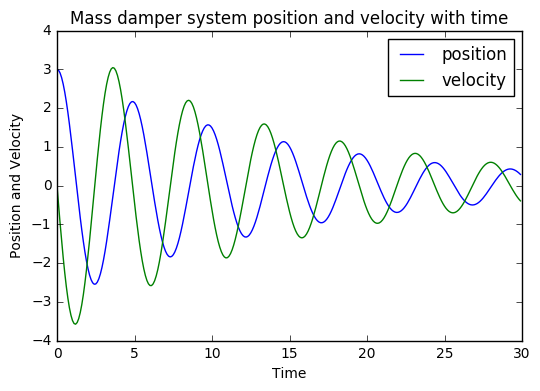

In [13]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


def mass_spring_damp_acc(state_of_system, time):
    """Right hand side of scipy.odeint, At each time step return
    the velocity and acceleration to evaluate the position.

    :param state_of_system: [position and velocity] as an array
    :param time: time
    :returns: [velocity and acceleration]
    :rtype: list

    """
    pos = state_of_system[0]
    vel = state_of_system[1]
    # Constants of mass damper
    spring_constant = 2.5
    damping_constant = 0.2
    mass = 1.5

    # compute the acceleration
    acc = (-spring_constant * pos - damping_constant * vel) / mass
    return [vel, acc]

    # plt.legend(loc='upper right')


INITIAL_STATE = [3.0, 0.0]
TIME = np.arange(0, 30, 0.1)
ALL_STATES = odeint(mass_spring_damp_acc, INITIAL_STATE, TIME)

plt.plot(TIME, ALL_STATES[:, 0], label='position')
plt.plot(TIME, ALL_STATES[:, 1], label='velocity')
plt.legend(loc='upper right')
plt.xlabel('Time')
plt.ylabel('Position and Velocity')
plt.title('Mass damper system position and velocity with time')
plt.show()
